# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [6]:
import pandas as pd
import numpy as np

In [2]:
boston = pd.read_csv("../data/boston_data.csv")

In [10]:
boston.shape

(404, 14)

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [18]:
from scipy import stats
boston = boston[(np.abs(stats.zscore(boston)) < 4).all(axis=1)]

In [20]:
boston.shape

(398, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


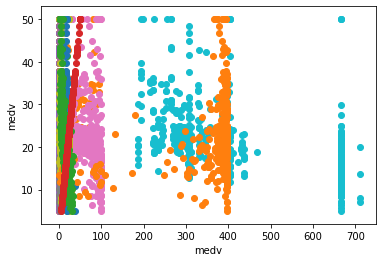

In [42]:
for column in boston:
    plt.scatter(boston[column], boston["medv"])
    plt.xlabel(column)
    plt.ylabel('medv')
    


In [60]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

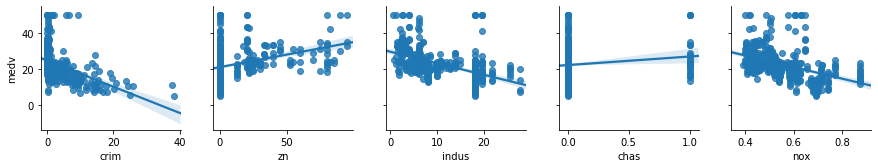

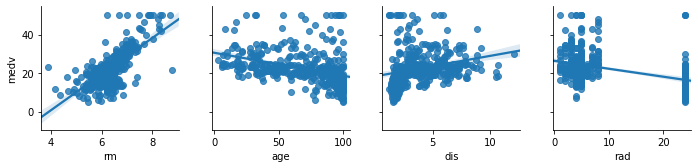

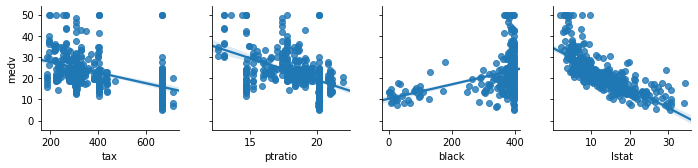

In [63]:
sns.pairplot(data = boston, y_vars="medv", x_vars=['crim', 'zn', 'indus', 'chas', 'nox'], kind = 'reg')
sns.pairplot(data = boston, y_vars="medv", x_vars=['rm', 'age', 'dis', 'rad'], kind = 'reg')
sns.pairplot(data = boston, y_vars="medv", x_vars=['tax',
       'ptratio', 'black', 'lstat'], kind = 'reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [50]:
corr = boston.corr()

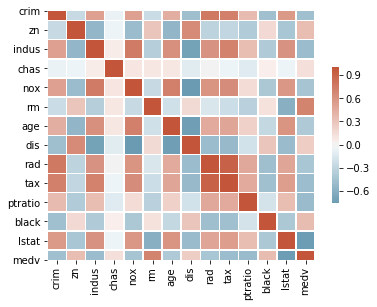

In [51]:
f, ax = plt.subplots(figsize=(6, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
for i in corr:
    for index, row in corr[i].iteritems():
        if row > 0.75 and row != 1.0:
            print(i + " <-->" + index + " ------>" + str(row))

crim <-->rad ------>0.7756059769300915
indus <-->nox ------>0.7577534284361758
nox <-->indus ------>0.7577534284361758
rad <-->crim ------>0.7756059769300915
rad <-->tax ------>0.9143568570519635
tax <-->rad ------>0.9143568570519635


In [66]:
boston_nocorr = boston.drop(columns = ["crim","nox", "rad"])

In [68]:
boston_nocorr.head()

,zn,indus,chas,rm,age,dis,tax,ptratio,black,lstat,medv
0,0.0,10.81,0.0,5.961,17.5,5.2873,305.0,19.2,376.94,9.88,21.7
1,25.0,5.13,0.0,5.927,47.2,6.9320,284.0,19.7,396.90,9.22,19.6
2,0.0,9.90,0.0,5.972,76.7,3.1025,304.0,18.4,396.24,9.97,20.3
3,0.0,19.58,0.0,5.597,94.9,1.5257,403.0,14.7,351.85,21.45,15.4
4,21.0,5.64,0.0,6.115,63.0,6.8147,243.0,16.8,393.97,9.43,20.5


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [69]:
boston_nocorr["medv"].describe()

count    398.000000
mean      22.459799
std        8.774737
min        5.000000
25%       17.325000
50%       21.550000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [70]:
from sklearn.metrics import r2_score

In [72]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [73]:
X = boston_nocorr.drop(columns = "medv")
y = boston_nocorr["medv"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
depths = range(1,50)
train = []
test = []
for i in depths:
    RF = RandomForestRegressor(max_depth = i)
    RF.fit(X_train, y_train)
    y_train_pred = RF.predict(X_train)
    y_test_pred = RF.predict(X_test)
    train.append(performance_metric(y_train, y_train_pred))
    test.append(performance_metric(y_test, y_test_pred))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [102]:
df = pd.DataFrame({"depth":depths,
                  "train":train,
                  "test":test})

Now, plot the score for each tree on the training set and on the testing set.

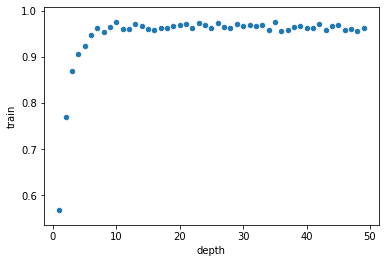

In [103]:
df.plot.scatter(x='depth', y='train')

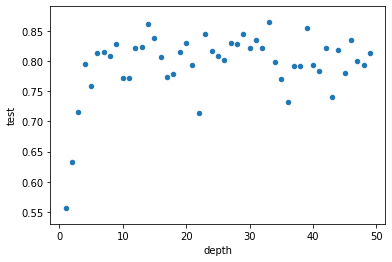

In [104]:
df.plot.scatter(x='depth', y='test')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [92]:
#There is a moment while increasing depth where even though in the train set the score increases, the score in the test set decreases.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [105]:
# When maximum depth is 1, the model is too simplistic and it is suffering from high bias, while if the maximum depth is 10 we are in risk of high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

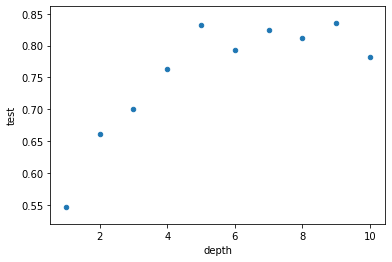

In [107]:
depths = range(1,11)
train = []
test = []
for i in depths:
    RF = RandomForestRegressor(max_depth = i)
    RF.fit(X_train, y_train)
    y_train_pred = RF.predict(X_train)
    y_test_pred = RF.predict(X_test)
    train.append(performance_metric(y_train, y_train_pred))
    test.append(performance_metric(y_test, y_test_pred))
df = pd.DataFrame({"depth":depths,
                  "train":train,
                  "test":test})
df.plot.scatter(x='depth', y='test')

In [108]:
#I would use 5 as maximum depth, because I think is the inflection point where the model stops improving over the test set and the high variance risk increases.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [109]:
# We always need to take into account the origin of the data. If the data is from 1978 and it is about house price we cannot rely on the model for actual predictions.
# There are many features that are determining the price house, and in this datset we have just a few.
# I don't think it is robus enough
# Urban cities and rural cities having different conditions and features, so we can not use this model to rural cities predictions